# Capstone project 1
Data wrangling

This is a short document describing the data wrangling steps that I undertook to clean the capstone project data set. What kind of cleaning steps did you perform? How did you deal with missing values, if any? Were there outliers, and how did you decide to handle them? This document will eventually become part of your milestone report.

The dataset I chose to work with was obtained from kaggle.
### Background

Living around the NYC area for a while, I’ve seen a lot of different traffic situations. Narrow streets and complicated traffic rules, as well as unreasonable traffic light durations and fearless pedestrians maybe all contributing to the vehicle collisions in NYC. Based on this dataset it’s possible to find out the most dangerous locations in 5 boroughs, the relations between number of collisions and time of a day (since there’re morning and evening peaks in a city like New York) or a year (due to influence of weather). 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
import seaborn as sns
sns.set()

In [49]:
df=pd.read_csv('NYC.csv')

Visually inspect the dataset first

In [50]:
df.shape

(477732, 29)

In [51]:
df.columns

Index(['UNIQUE KEY', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'PERSONS INJURED', 'PERSONS KILLED',
       'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED', 'MOTORISTS INJURED', 'MOTORISTS KILLED',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE',
       'VEHICLE 5 TYPE', 'VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR',
       'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
UNIQUE KEY             477732 non-null int64
DATE                   477732 non-null object
TIME                   477732 non-null object
BOROUGH                338390 non-null object
ZIP CODE               338329 non-null float64
LATITUDE               356600 non-null float64
LONGITUDE              356600 non-null float64
LOCATION               356600 non-null object
ON STREET NAME         364552 non-null object
CROSS STREET NAME      335574 non-null object
OFF STREET NAME        58511 non-null object
PERSONS INJURED        477732 non-null int64
PERSONS KILLED         477732 non-null int64
PEDESTRIANS INJURED    477732 non-null int64
PEDESTRIANS KILLED     477732 non-null int64
CYCLISTS INJURED       477732 non-null int64
CYCLISTS KILLED        477732 non-null int64
MOTORISTS INJURED      477732 non-null int64
MOTORISTS KILLED       477732 non-null int64
VEHICLE 1 TYPE        

In [54]:
#Convert column headers to lowercase so it's easier to type
df.columns = [x.lower() for x in df.columns]

In [55]:
df.borough.value_counts(dropna=False)

NaN              139342
BROOKLYN         104961
QUEENS            89655
MANHATTAN         83602
BRONX             46124
STATEN ISLAND     14048
Name: borough, dtype: int64

I really thought Manhattan would have the biggest number of collisions since it's more crowded in my mind. Given this count number it's actually Brooklyn, and even queens is going beyond Manhattan.

We've seen date and time in column names, it's neccessary to convert them into ISO standard if they're not.

In [7]:
datetime=pd.to_datetime(df.date+' '+df.time)
datetime.head()


0   2015-01-01 00:20:00
1   2015-01-01 00:20:00
2   2015-01-01 00:21:00
3   2015-01-01 00:30:00
4   2015-01-01 00:33:00
dtype: datetime64[ns]

In [27]:
#Look for null values in each column
null=df.isnull().sum()
#I decide to remove columns with over 90% null value here
remove=null[null>(0.9*len(df))]
#remove parameters for vehicle 3,4,5
del df['vehicle 3 type']
del df['vehicle 4 type']
del df['vehicle 5 type']
del df['vehicle 3 factor']
del df['vehicle 4 factor']
del df['vehicle 5 factor']


In [45]:
df.shape

(477732, 21)

Drop duplicate data if there's any

In [44]:
df=df.drop_duplicates()

In [46]:
df.shape

(477732, 21)

Oh good, looks like there is no duplicate data. So we're continuing for outliers.

In [60]:
df[['persons killed','persons injured']].describe()

,persons killed,persons injured
count,477732.000000,477732.000000
mean,0.001059,0.247875
std,0.034037,0.644326
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3.000000,32.000000


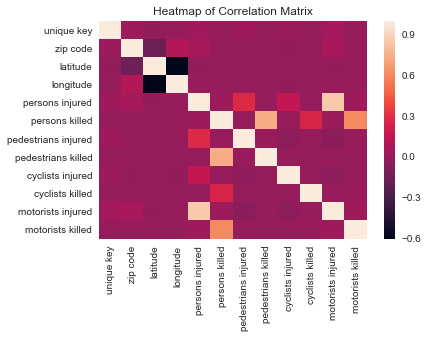

In [31]:
#Run heatmap for numerical columns to see how they're related
col_corr =df.corr()
sns.heatmap(col_corr)
plt.title('Heatmap of Correlation Matrix')
plt.show()